In [ ]:
# !add-apt-repository ppa:ubuntugis/ppa
# !apt-get update -y
# !apt-get -y install gdal-bin libgdal-dev
# !pip3 install --upgrade pip
# !pip install --upgrade pip setuptools wheel
!pip install eo-learn

In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters
from skimage import exposure
from skimage import measure

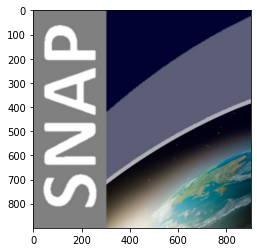

In [3]:
im = io.imread('/home/data/Snap.jpg')
plt.imshow(im)

In [4]:
idx = 0
val = filters.threshold_otsu(im[..., [idx]])
mask = im < val
mask.shape

(900, 900, 3)

In [5]:
hist, bins_center = exposure.histogram(im[..., idx])

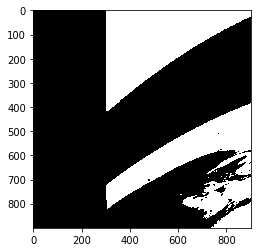

In [6]:
plt.imshow(mask[..., [idx]], cmap='gray', interpolation='nearest')

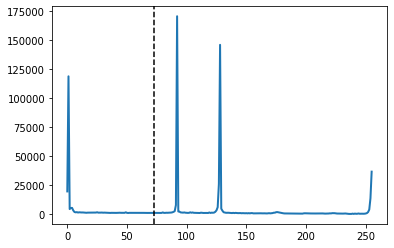

In [7]:
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color='k', ls='--')

In [8]:
all_labels = measure.label(mask[..., [idx]])
all_labels

array([[[ 0],
        [ 0],
        [ 0],
        ...,
        [ 1],
        [ 1],
        [ 1]],

       [[ 0],
        [ 0],
        [ 0],
        ...,
        [ 1],
        [ 1],
        [ 1]],

       [[ 0],
        [ 0],
        [ 0],
        ...,
        [ 1],
        [ 1],
        [ 1]],

       ...,

       [[ 0],
        [ 0],
        [ 0],
        ...,
        [33],
        [33],
        [33]],

       [[ 0],
        [ 0],
        [ 0],
        ...,
        [33],
        [33],
        [33]],

       [[ 0],
        [ 0],
        [ 0],
        ...,
        [33],
        [33],
        [33]]], dtype=int32)

In [9]:
blobs_labels = measure.label(mask[..., [idx]], background=0)
blobs_labels

array([[[ 0],
        [ 0],
        [ 0],
        ...,
        [ 1],
        [ 1],
        [ 1]],

       [[ 0],
        [ 0],
        [ 0],
        ...,
        [ 1],
        [ 1],
        [ 1]],

       [[ 0],
        [ 0],
        [ 0],
        ...,
        [ 1],
        [ 1],
        [ 1]],

       ...,

       [[ 0],
        [ 0],
        [ 0],
        ...,
        [33],
        [33],
        [33]],

       [[ 0],
        [ 0],
        [ 0],
        ...,
        [33],
        [33],
        [33]],

       [[ 0],
        [ 0],
        [ 0],
        ...,
        [33],
        [33],
        [33]]], dtype=int32)

In [10]:
np.all(all_labels == blobs_labels)

True

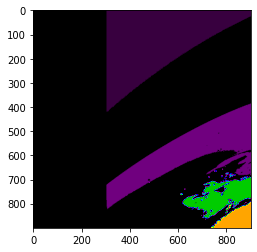

In [11]:
plt.imshow(all_labels, cmap='nipy_spectral')

In [12]:
np.unique(all_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=int32)

In [13]:
properties = measure.regionprops(all_labels)
properties[0].axis_major_length

710.364448631357

In [14]:
dummy = np.zeros((10, 10), dtype=np.int8)
# dummy[4:8, 4] = 1
# dummy [[7, 6, 5, 4, 3, 2], [2, 3, 4, 5, 6, 7]] = 1
dummy[[7, 6, 5, 4, 3, 2], [7, 6, 5, 4, 3, 2]] = 1
# dummy[3:6, 3:6] = 1; dummy[2, 4] = 1; dummy[6, 4] = 1
# dummy[3:6, 3:6] = 1; dummy[2, 2] = 1; dummy[6, 6] = 1
dummy_label = measure.label(dummy, background=0)
properties = measure.regionprops(dummy_label)
properties[0].orientation*180/np.pi

-45.0

In [15]:
help(measure.regionprops)

Help on function regionprops in module skimage.measure._regionprops:

regionprops(label_image, intensity_image=None, cache=True, coordinates=None, *, extra_properties=None)
    Measure properties of labeled image regions.
    
    Parameters
    ----------
    label_image : (M, N[, P]) ndarray
        Labeled input image. Labels with value 0 are ignored.
    
        .. versionchanged:: 0.14.1
            Previously, ``label_image`` was processed by ``numpy.squeeze`` and
            so any number of singleton dimensions was allowed. This resulted in
            inconsistent handling of images with singleton dimensions. To
            recover the old behaviour, use
            ``regionprops(np.squeeze(label_image), ...)``.
    intensity_image : (M, N[, P][, C]) ndarray, optional
        Intensity (i.e., input) image with same size as labeled image, plus
        optionally an extra dimension for multichannel data. Currently,
        this extra channel dimension, if present, must be the l

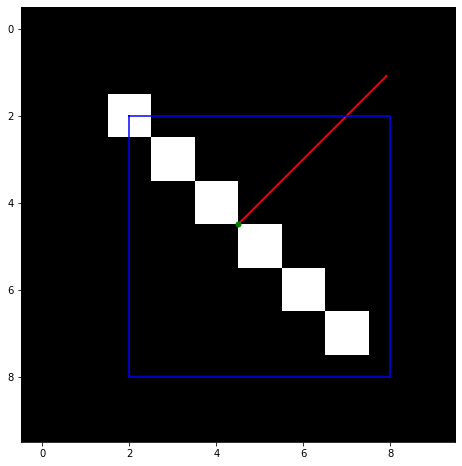

In [16]:
import math

fig, ax = plt.subplots(figsize=(10, 8))

for p in properties:

    y0, x0 = p.centroid
    orientation = p.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * p.axis_minor_length
    y1 = y0 - math.sin(orientation) * 0.5 * p.axis_minor_length
    x2 = x0 - math.sin(orientation) * 0.5 * p.axis_major_length
    y2 = y0 - math.cos(orientation) * 0.5 * p.axis_major_length

    # rr, cc = ellipse_perimeter(int(x0), int(y0), props.axis_major_length, props.axis_minor_length, orientation, img.shape)
    # img[rr, cc] = (1, 0, 1)

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=1.8)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=1.8)
    ax.plot(x0, y0, '.g', markersize=10)

    minr, minc, maxr, maxc = p.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=1.5)
ax.imshow(dummy_label, cmap='gray')

In [17]:
import skimage
skimage.__version__

'0.19.2'

In [18]:
help(measure.regionprops)

Help on function regionprops in module skimage.measure._regionprops:

regionprops(label_image, intensity_image=None, cache=True, coordinates=None, *, extra_properties=None)
    Measure properties of labeled image regions.
    
    Parameters
    ----------
    label_image : (M, N[, P]) ndarray
        Labeled input image. Labels with value 0 are ignored.
    
        .. versionchanged:: 0.14.1
            Previously, ``label_image`` was processed by ``numpy.squeeze`` and
            so any number of singleton dimensions was allowed. This resulted in
            inconsistent handling of images with singleton dimensions. To
            recover the old behaviour, use
            ``regionprops(np.squeeze(label_image), ...)``.
    intensity_image : (M, N[, P][, C]) ndarray, optional
        Intensity (i.e., input) image with same size as labeled image, plus
        optionally an extra dimension for multichannel data. Currently,
        this extra channel dimension, if present, must be the l

In [19]:
image = np.asarray(im)
image

array([[[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [  1,   2,  50],
        [  1,   2,  50],
        [  1,   2,  50]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [  1,   2,  50],
        [  1,   2,  50],
        [  1,   2,  50]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [  1,   2,  50],
        [  1,   2,  50],
        [  1,   2,  50]],

       ...,

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [ 32,  40,  43],
        [ 37,  45,  48],
        [ 38,  46,  49]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [ 37,  45,  48],
        [ 43,  51,  54],
        [ 44,  52,  55]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [ 41,  49,  52],
        [ 46,  54,  57],
        [ 48,  56,  59]]

In [20]:
red = image[..., 0]
green = image[..., 1]
blue = image[..., 2]

In [21]:
image[..., [0]].dtype

dtype('uint8')

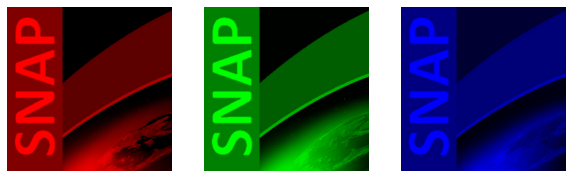

In [22]:
fig, axes = plt.subplots(figsize=(10, 8), ncols=3, nrows=1)
ch_names = ['Reds', 'Blues', 'Greens']
for i in range(3):
    temp = np.zeros(image.shape, dtype='uint8')
    temp[:, :, i] = image[..., i]
    axes[i].imshow(temp)
    axes[i].set_axis_off()

In [23]:
height, width = red.shape
height, width

(900, 900)

In [47]:
centre_idx = np.random.randint(low=0,
                               high=height,
                               size=(10, 2),
                               dtype='uint16')
centre_idx

array([[  8, 151],
       [796, 614],
       [115, 435],
       [363, 538],
       [739, 324],
       [308, 196],
       [ 61, 150],
       [705, 459],
       [635, 508],
       [766, 415]], dtype=uint16)

In [48]:
kheight, kwidth = kernel = (80, 80)
kheight, kwidth

(80, 80)

In [49]:
idx = 7
up = centre_idx[idx, 0]  - kheight
down = centre_idx[idx, 0] + kheight

left = centre_idx[idx, 1] - kwidth
right = centre_idx[idx, 1] + kwidth

In [50]:
# valid_mask = ~np.any((up < 0, down >= height, left < 0, right >= width))
# valid_mask

In [51]:
# centre_idx_valid = centre_idx[valid_mask]
# up = up[valid_mask]
# down = down[valid_mask]

# left = left[valid_mask]
# right = right[valid_mask]

In [52]:
mask = np.zeros((height, width), dtype=np.uint8)
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [53]:
mask[up:down, left:right] = 1
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

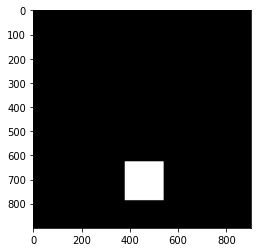

In [54]:
plt.imshow(mask, cmap=plt.cm.get_cmap('Greys').reversed())

In [55]:
red_list = list()
for i in centre_idx_valid:
    red_list.append(red[up[i]:down[i], left[i]:right[i]])
        
red_list = np.stack(red_list)
red_list.shape

NameError: name 'centre_idx_valid' is not defined

In [90]:
red.shape

(900, 900)

In [ ]:
for i in range(10):
    print(centre_idx_valid[i], up[i], down[i], left[i], right[i])